In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [3]:
data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)

In [14]:
pixel_values,targets = data
targets

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
targets = targets.astype(int)

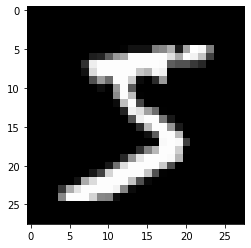

In [22]:
single_image = pixel_values[0].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [28]:
tsne = manifold.TSNE(n_components=2,random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000])

In [29]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:3000])),columns=["x","y","targets"])

In [30]:
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [31]:
tsne_df.head()

,x,y,targets
0,-9.74227,-28.5485,5
1,-25.4766,-66.111,0
2,-39.9927,32.7073,4
3,46.73,29.8641,1
4,-14.2796,30.5053,9


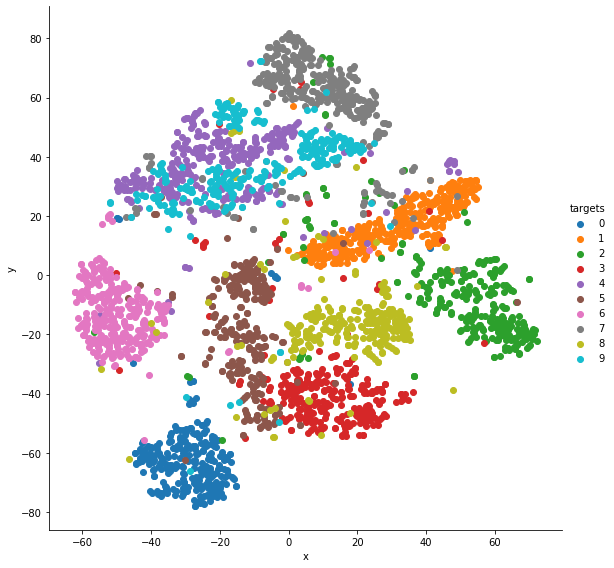

In [33]:
grid = sns.FacetGrid(tsne_df,hue="targets",height=8)
grid.map(plt.scatter,"x","y").add_legend()